<a href="https://colab.research.google.com/github/JasLieb/IML/blob/master/TP5/TP_decision_tree_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Arbre de desicion  
le Dataset que vous avez concerne une dataset de cancer du sein (BreastConser).

le travail demender c'est consiruire un model pour predir la class 2 ou 4 dans se dataset 
1- écrire un modele utilisant le arbre de desicion 
https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
3- comparer les deux modèles via la fonction accuracy_score     from sklearn import metrics    

le travail à rendre la veille de la séance prochaine 

# Travail réalisé par 
- Jason Liebault M1 Dev log. mobile et Iot 
- Matthieu Ryckmaan M2 Data Science


## Importation des libs nécessaires

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree

## Prise de connaissance des données

In [160]:
dataset = pd.read_csv('breastCancer.csv')
dataset.replace('?', 0, inplace=True)
dataset = dataset.applymap(np.int64)
dataset

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## Séparation de la matrice des données X de la liste des classes y
### On dénombre deux classes représentées par un entier distinctif 2 et 4

In [161]:
X = dataset.iloc[:, 1:-1].values    
y = dataset.iloc[:, -1].values
X,y


(array([[ 5,  1,  1, ...,  3,  1,  1],
        [ 5,  4,  4, ...,  3,  2,  1],
        [ 3,  1,  1, ...,  3,  1,  1],
        ...,
        [ 5, 10, 10, ...,  8, 10,  2],
        [ 4,  8,  6, ..., 10,  6,  1],
        [ 4,  8,  8, ..., 10,  4,  1]]),
 array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
        2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
        4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
        2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
        2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
        4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
        2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
        2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
        2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
        2, 

## Tranposition de la liste y en une liste de booléens y_new
### Avec y_new[i] = y[i] == 2 

In [162]:
y_new = []
for i in range(len(y)):
  if y[i] == 2:
      y_new.append(0)
  else:
      y_new.append(1)
y_new = np.array(y_new)
y_new

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

## Créations des *sets* d'entraïnement et de test

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.25, random_state = 0)
X_train, X_test, y_train, y_test

(array([[ 8, 10,  4, ...,  8,  2,  1],
        [ 3,  1,  2, ...,  2,  1,  1],
        [ 8, 10, 10, ...,  4,  8,  7],
        ...,
        [ 4,  1,  1, ...,  1,  1,  1],
        [ 5,  1,  1, ...,  2,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]]), array([[4, 1, 2, ..., 1, 1, 1],
        [4, 2, 2, ..., 2, 1, 1],
        [6, 6, 6, ..., 7, 8, 1],
        ...,
        [5, 3, 2, ..., 1, 1, 1],
        [1, 1, 1, ..., 3, 1, 1],
        [4, 1, 1, ..., 3, 2, 1]]), array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0,

## Affichage du modèle, de l'arbre de décision par classification
### Avec les *sets* d'entraînement

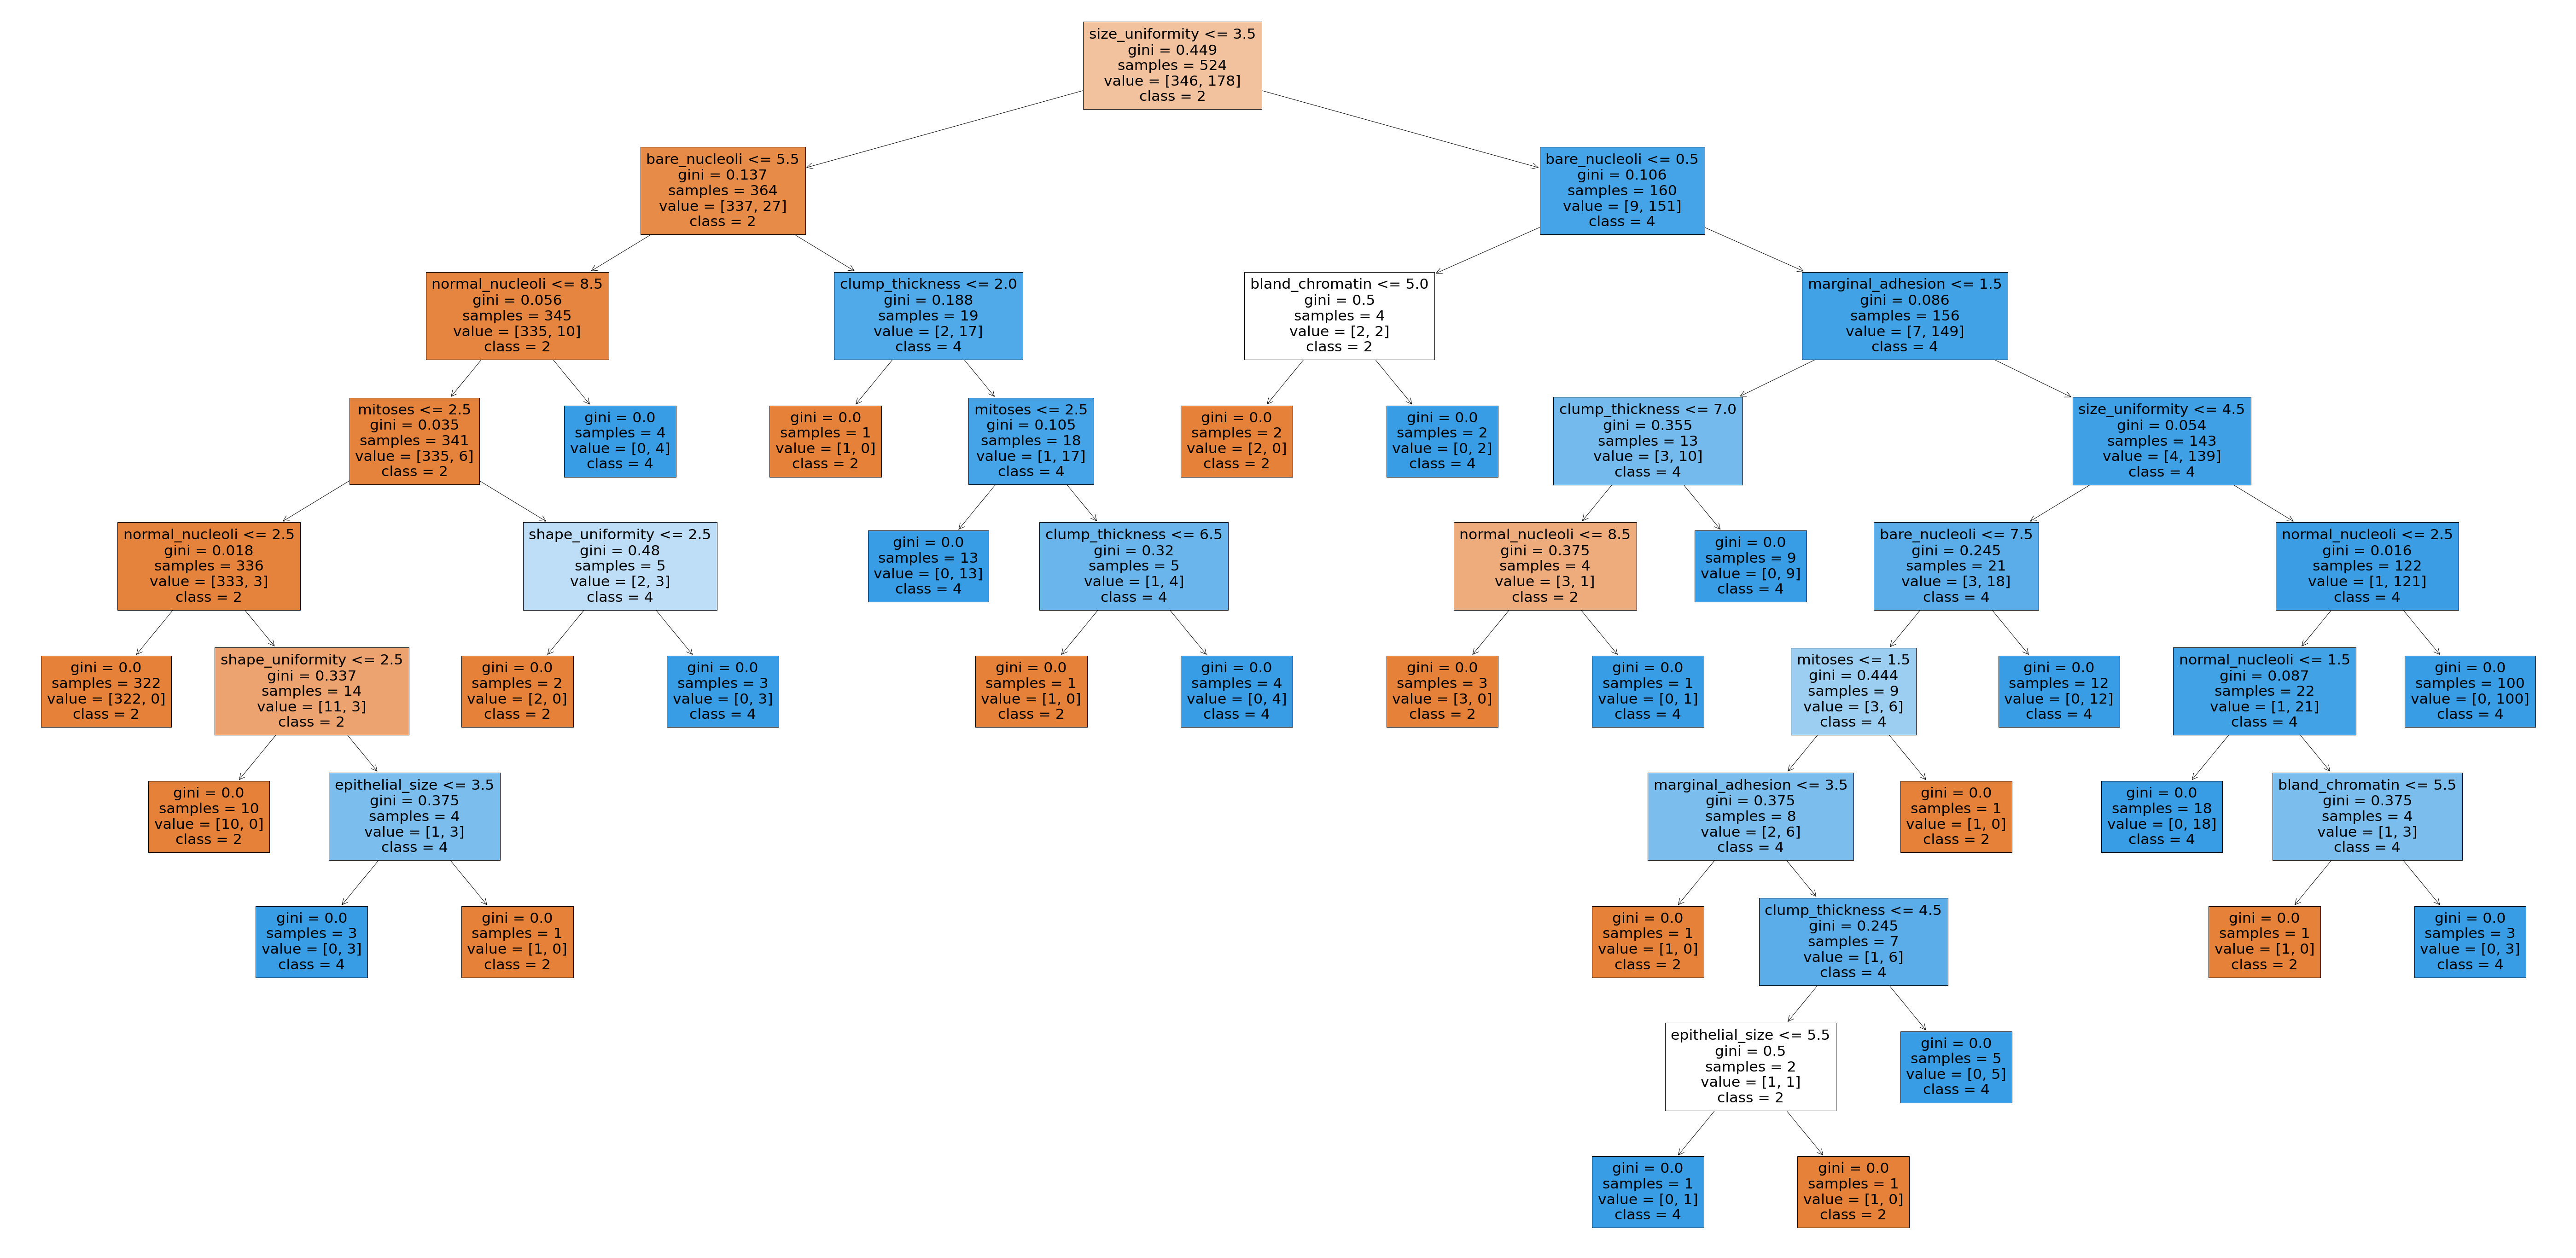

In [164]:
features = dataset.iloc[:,1:-1].columns.values
clf = tree.DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
plt.figure(figsize=(100,50))
tree.plot_tree(clf, filled=True, class_names=['2', '4'], rotate=False, feature_names=features) 
plt.show()

## Réalisation des prédictions suivant le modèle
### Et calcul des taux de précision pour le résultat obtenu

In [165]:
y_pred = clf.predict(X_test)
print(y_pred)
print(metrics.precision_score(y_test,y_pred,pos_label=0))
print(metrics.precision_score(y_test,y_pred,pos_label=1))

[0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
0.972972972972973
0.9375


# NB : L'ancien TP n'a pas été réalisé avec le même jeu de données
## Donc nous ne pouvons établir de comparaison avec la valeur de précision obtenu avec un modèle de classification par voisins